In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

import urllib.request
import urllib.parse
from bs4 import BeautifulSoup
import re

import sys, os, time, random
import warnings

ROOT_PATH = 'examples/ch_01'
warnings.filterwarnings('ignore')

## **1. Downloading Web Data**

##### **Download Using `urllib.request`**

* `urllib.request.urlretrieve()` : Download file(s) directly to given path

In [2]:
# Download File from URL
url = 'https://upload.wikimedia.org/wikipedia/commons/3/30/Seoul_National_University_Hospital_logo.png'
filename = f'{ROOT_PATH}/SNUH_urlretrieve.png'

urllib.request.urlretrieve(url, filename)

('examples/ch_01/SNUH_urlretrieve.png',
 <http.client.HTTPMessage at 0x7f316462ba90>)

In [3]:
def showImage(filename, figsize=(6, 3), fontsize=10):
    # Read Downloaded Image
    img = cv2.imread(filename, cv2.IMREAD_UNCHANGED)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGBA)

    # Show Image
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(img)
    ax.set_title(filename, fontsize=fontsize)
    ax.axis('off')

    plt.show()

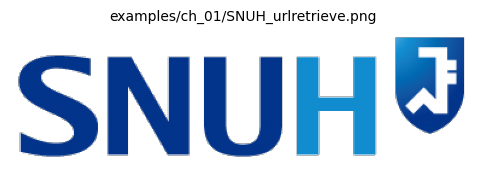

In [4]:
showImage(filename)

* `urllib.request.urlopen()` : Download file(s) to memory

In [5]:
# Download File to Memory
url = 'https://upload.wikimedia.org/wikipedia/commons/3/30/Seoul_National_University_Hospital_logo.png'
filename = f'{ROOT_PATH}/SNUH_urlopen.png'

# Returns Byte String
img = urllib.request.urlopen(url).read()
print(f'Raw data : {img}')

# Write File
with open(filename, 'wb') as f:
    f.write(img)
    print(f'Saving image to [{filename}] done...')


Raw data : b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x82\x00\x00\x00p\x08\x06\x00\x00\x00\x13\xd7w/\x00\x00:\xf2IDATx\xda\xed\x9d\x07|T\xd7\x99\xe8%\x90\x84\x01u\x81\xe3\xb7\xbb/\xcfe\xb3\xe5\xfd\xb2\xc5\xd2\x8cp\x05Q\\0\xdd\xdd\xd8N0.`\'Y\xc76v\x12\'\x06\x84\rhF3\x92(\x06$\x9a\x04*t\xd3\x02n\xa8R\x0cBT\xdb \x0c\x0e\xb8\xadK\xb2N\xd9\xe4\xed/6\xfa\xde\xf9\xbeS\xee\xb9\xa3v\xa5\x19\x8d4\xe8|\xfe\x1d\xcfh\x90\xa6\xdc\xb9\xf7\xfb\x9f\xafGE\x191b\xc4\x88\x11#F\x8c\x181b\xc4\x88\x11#F\x8c\x181b\xc4\x88\x11#F\x8c\x181b\xc4\x88\x11#F\x8c\x181b\xc4\x88\x11#F\x8c\x181b\xc4\x88\x11#\x97\xbe\x8c)=\x0b\xa3\xd6~\x00CK\xce\xc0u\xab\x1b\xc1\xbd\xea4\xfcK\xe1)\xf8\xa7\xc2\x93p\xcd\x92S\xf0\xdd\xc5\xef\xc2\xdf,8\t\x97\x17\x1c\x87Ay\xc7!\xcd\x7f\x0cR}G!\xcd{\x04\xd2r\x1a u\xfeaH\x9bw\x10\xd2^y\x07\xd2\xe6\x1c\x80A\xd9\xfba\xd0\xac}\x906s/\xa4\xfc\xaa\x16\x92\x7fY\x03\x89\xbf\xa8\x82\xf8\x9f\xed\x81\x01\xcf\xef\x81\xfe3\xde\x86~\xcf\xbe\t\xb1?}\x1db\x9e\xde\r1?\xfe5\xf4\xfd\xd1N\xe8\xfb\xe4\x0e\x

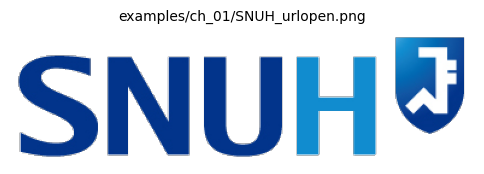

In [6]:
showImage(filename)

##### **Web Data Extraction**

* Print client connection information from [Web API](http://api.aoikujira.com/)

In [7]:
url = 'http://api.aoikujira.com/ip/ini'

data = urllib.request.urlopen(url).read()
text = data.decode('utf-8').rstrip()

print(text)

<pre>[ip]
API_URI=http://api.aoikujira.com/ip/get.php
REMOTE_ADDR=1.225.51.6
REMOTE_HOST=1.225.51.6
REMOTE_PORT=41592
HTTP_HOST=api.aoikujira.com
HTTP_USER_AGENT=Python-urllib/3.10
HTTP_ACCEPT_LANGUAGE=
HTTP_ACCEPT_CHARSET=
SERVER_PORT=80
FORMAT=ini


* Send requests by adding parameters : [WeatherKorea](http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp)

    * Returns weather information of location given `stnId` (station ID)

    * `urllib.parse.urlencode()` : URL encoding of parameters

    * Example of encoded URL : *ht<area>tp://example.com?key1=v1&key2=v2&...*

    * Parsing of the output data is done using `BeautifulSoup`, which is introduced in further sections

In [8]:
API = 'http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp'

# URL Encode Parameters
values = {
    'stnId' : '109'
}
params = urllib.parse.urlencode(values)

# Generate Request URL
url = f'{API}?{params}'
print(f'Request URL : {url}')

# Download Data from URL
data = urllib.request.urlopen(url).read()
text = data.decode('utf-8')
print(f'===== Downloaded Data =====\n{text[:1000]}\n...')

Request URL : http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp?stnId=109
===== Downloaded Data =====
<?xml version="1.0" encoding="utf-8" ?>
<rss version="2.0">
<channel>
<title>기상청 육상 중기예보</title>
<link>http://www.kma.go.kr/weather/forecast/mid-term_02.jsp</link>
<description>기상청 날씨 웹서비스</description>
<language>ko</language>
<generator>기상청</generator>
<pubDate>2023년 12월 23일 (토)요일 06:00</pubDate>
 <item>
<author>기상청</author>
<category>육상중기예보</category>
<title>서울,경기도 육상 중기예보 - 2023년 12월 23일 (토)요일 06:00 발표</title>
<link>http://www.kma.go.kr/weather/forecast/mid-term_02.jsp</link>
<guid>http://www.kma.go.kr/weather/forecast/mid-term_02.jsp</guid>
<description>
	<header>
		<title>서울,경기도 육상중기예보</title>
		<tm>202312230600</tm>
		<wf><![CDATA[○ (하늘상태) 28일(목)~29일(금)은 대체로 맑겠고, 그 밖의 날은 흐리거나 구름많겠습니다.<br />○ (기온) 이번 예보기간 동안 아침 기온 -8~0도, 낮 기온 3~7도로 평년(최저기온 -11~-4도 최고기온 1~4도)보다 높겠습니다.<br />○ (해상) 서해중부해상의 물결은 0.5~2.0m로 일겠습니다.]]></wf>
	</header>
	<body>
				

		<location wl_ver="3">
				<provin

## **2. Scraping Using `BeautifulSoup`**

##### **Overview of `BeautifulSoup`**

* Basics of `BeautifulSoup`

In [9]:
# Sample HTML (examples/ch_01/ex_01.html)
html = """
<html><body>
    <h1>What is scraping?</h1>
    <p>Scraping is about analyzing web pages</p>
    <p>Scraping is about extracting useful information</p>
</body></html>
"""

# Parse HTML with BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')

# Extract Specific Information
h1 = soup.html.body.h1
p1 = soup.html.body.p
p2 = p1.next_sibling.next_sibling

# Print Results
print(f'h1 = {h1.string}')
print(f'p  = {p1.string}')
print(f'p  = {p2.string}')

h1 = What is scraping?
p  = Scraping is about analyzing web pages
p  = Scraping is about extracting useful information


* `BeautifulSoup.find()` : Find element by `id`

In [10]:
# Sample HTML (examples/ch_01/ex_02.html)
html = """
<html><body>
    <h1 id="title">What is scraping?</h1>
    <p id="body">Scraping is about analyzing web pages</p>
    <p>Scraping is about extracting useful information</p>
</body></html>
"""

# Parse HTML with BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')

# Find Element by ID
title = soup.find(id='title')
body  = soup.find(id='body')

# Print Results
print(f'ID(title) = {title.string}')
print(f'ID(body)  = {body.string}')

ID(title) = What is scraping?
ID(body)  = Scraping is about analyzing web pages


* `BeautifulSoup.find_all()` : Find all elements

In [11]:
# Sample HTML (examples/ch_01/ex_03.html)
html = """
<html><body>
    <ul>
        <li><a href="http://www.naver.com">Naver</a></li>
        <li><a href="http://www.google.com">Google</a></li>
        <li><a href="http://my.snu.ac.kr">My SNU</a></li>
    </ul>
</body></html>
"""

# Parse HTML
soup = BeautifulSoup(html, 'html.parser')

# Find Links with find_all()
links = soup.find_all('a')

# Print Results
for link in links:
    href = link.attrs['href']
    text = link.string
    print(f'{text:7s}> {href}')

Naver  > http://www.naver.com
Google > http://www.google.com
My SNU > http://my.snu.ac.kr


* Combining `urllib.request.urlopen()` with `BeautifulSoup`

In [12]:
# Fetch HTML
url = 'http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp'
res = urllib.request.urlopen(url)

# Parse HTML
soup = BeautifulSoup(res, 'html.parser')

# Extract Information
title = soup.find('title').string
weather_forecast = soup.find('wf').string

print(f'Title : {title}')
print(f'Weather Forecast : {weather_forecast}')

Title : 기상청 육상 중기예보
Weather Forecast : ○ (하늘상태) 이번 예보 기간에는 전국이 가끔 구름많겠습니다. <br />○ (기온) 이번 예보기간 동안 아침 기온은 -7~5도, 낮 기온은 3~12도로 평년(최저기온 -9~1도, 최고기온 1~9도)과 비슷하거나 조금 높겠습니다.


* Using CSS selectors

    * `soup.select_one(selector)` : Extract 1 element as CSS selector

    * `soup.select(selector)` : Select a list of elements as CSS selector

In [13]:
# Sample HTML (examples/ch_01/ex_04.html)
html = """
<html><body>
    <div id="meigen">
        <h1>Wikibooks Books</h1>
        <ul class="items">
            <li>Unity Game Effect Basics</li>
            <li>iPhone App Development with Swift</li>
            <li>Moder Website Design</li>
        </ul>
    </div>
</body></html>
"""

# Parse HTML
soup = BeautifulSoup(html, 'html.parser')

# Extract Title
h1 = soup.select_one('div#meigen > h1').string
print(f'h1 = {h1}')

# Extract Content
li_list = soup.select('div#meigen > ul.items > li')
for li in li_list:
    print(f'li = {li.string}')

h1 = Wikibooks Books
li = Unity Game Effect Basics
li = iPhone App Development with Swift
li = Moder Website Design


##### **(Ex) Exchange Rate Exctraction from [Naver Finance](https://finance.naver.com/marketindex/)**

In [14]:
# Fetch HTML
url = 'https://finance.naver.com/marketindex/'
res = urllib.request.urlopen(url)

# Extract USD/KRW
soup = BeautifulSoup(res, 'html.parser')
items = soup.select('h3.h_lst > span.blind')
rates = soup.select('div.head_info > span.value')

df = pd.DataFrame({
    'Item' : [item.string for item in items], 
    'Rate' : [rate.string for rate in rates],
    })
df

,Item,Rate
0,미국 USD,"1,303.00"
1,일본 JPY(100엔),914.42
2,유럽연합 EUR,"1,434.86"
3,중국 CNY,182.08
4,달러/일본 엔,142.0700
5,유로/달러,1.1037
6,영국 파운드/달러,1.2734
7,달러인덱스,101.3300
8,WTI,73.56
9,휘발유,1584.05


## **3. CSS Selector**

##### **(Ex) Scraping List of NBA Teams from [Wikipedia](https://en.wikipedia.org/wiki/National_Basketball_Association)**

* Inspector (Ctrl+Shift+I) > Select Element > Copy > CSS Selector

* `BeautifulSoup` doesn't support `nth-child()` attribute

In [15]:
url = 'https://en.wikipedia.org/wiki/National_Basketball_Association'
res = urllib.request.urlopen(url)
soup = BeautifulSoup(res, 'html.parser')

a_list = soup.select('table.wikitable > tbody > tr > td > b > a')
a_list = sorted([a.string for a in a_list])

for a in a_list:
    print(f'- {a}')

- Atlanta Hawks
- Boston Celtics
- Brooklyn Nets
- Charlotte Hornets
- Chicago Bulls
- Cleveland Cavaliers
- Dallas Mavericks
- Denver Nuggets
- Detroit Pistons
- Golden State Warriors
- Houston Rockets
- Indiana Pacers
- Los Angeles Clippers
- Los Angeles Lakers
- Memphis Grizzlies
- Miami Heat
- Milwaukee Bucks
- Minnesota Timberwolves
- New Orleans Pelicans
- New York Knicks
- Oklahoma City Thunder
- Orlando Magic
- Philadelphia 76ers
- Phoenix Suns
- Portland Trail Blazers
- Sacramento Kings
- San Antonio Spurs
- Toronto Raptors
- Utah Jazz
- Washington Wizards


##### **Extracting Data with CSS Selector**

* (Ex) CSS Selector example

In [16]:
def printSelector(soup, sel):
    print(f'{sel:20s} | {soup.select_one(sel).string}')

In [17]:
# Sample HTML (examples/ch_01_ex_05.html)
html = """
<html><body>
<ul id="bible">
    <li id="ge">Genesis</li>
    <li id="ex">Exodus</li>
    <li id="le">Leviticus</li>
    <li id="nu">Numbers</li>
    <li id="de">Deuteronomy</li>
</ul>
</body></html>
"""
with open('examples/ch_01/ex_05.html', encoding='utf-8') as f:
    soup = BeautifulSoup(f, 'html.parser')

# Practice CSS selectors
printSelector(soup, '#nu')
printSelector(soup, 'li#ge')
printSelector(soup, 'li[id="le"]')
printSelector(soup, 'ul#bible > li#de')
printSelector(soup, 'li:nth-of-type(4)')

#nu                  | Numbers
li#ge                | Genesis
li[id="le"]          | Leviticus
ul#bible > li#de     | Deuteronomy
li:nth-of-type(4)    | Numbers


* (Ex) Select `avocado` from HTML

In [18]:
with open('examples/ch_01/ex_06.html', encoding='utf-8') as f:
    soup = BeautifulSoup(f, 'html.parser')

# Practice CSS selectors
printSelector(soup, '#ve-list > li:nth-of-type(4)')

cond = {'data-lo':'us', 'class':'black'}
print(soup.find('li', cond).string)
print(soup.find(id='ve-list').find('li', cond).string)

#ve-list > li:nth-of-type(4) | Avocado
Avocado
Avocado


##### **Combining with Regular Expression : [`re` module](https://docs.python.org/ko/3/library/re.html)**

* Extracting links with `https` protocols from `<a>` tags

* `soup.find_all(href=re.compile(<regex>))`

In [19]:
# Sample HTML (examples/ch_01/ex_07.html)
html = """
<html><body>
    <ul>
        <li><a href="hoge.html">hoge</a></li>
        <li><a href="https://example.com/fuga">fuga*</a></li>
        <li><a href="https://example.com/foo">foo*</a></li>
        <li><a href="http://example.com/aaa">aaa</a></li>
    </ul>
</body></html>
"""

with open('examples/ch_01/ex_07.html', encoding='utf-8') as f:
    soup = BeautifulSoup(f, 'html.parser')

li = soup.find_all(href=re.compile(r'^https://'))
for ele in li:
    print(ele.attrs['href'])

https://example.com/fuga
https://example.com/foo


## **4. Downloading Data as a Whole**

##### **Dealing with Relative Path**

* `urllib.parse.urljoin(base, path)` : Join URLs

In [20]:
base = 'http://example.com/html/a.html'

print(urllib.parse.urljoin(base, 'b.html'))
print(urllib.parse.urljoin(base, 'sub/c.html'))
print(urllib.parse.urljoin(base, '../index.html'))
print(urllib.parse.urljoin(base, '../img/hoge.png'))
print(urllib.parse.urljoin(base, '../css/hoge.css'))

print(urllib.parse.urljoin(base, '/hoge.html'))
print(urllib.parse.urljoin(base, 'http://otherExample.com/wiki'))
print(urllib.parse.urljoin(base, '//anotherExample.org/test'))

http://example.com/html/b.html
http://example.com/html/sub/c.html
http://example.com/index.html
http://example.com/img/hoge.png
http://example.com/css/hoge.css
http://example.com/hoge.html
http://otherExample.com/wiki
http://anotherExample.org/test


##### **Recursive Manipulation of HTML Pages : [`scikit-learn` Documentation](https://scikit-learn.org/stable/modules/classes.html)**

In [21]:
def linkList(html, base):
    soup = BeautifulSoup(html, 'html.parser')
    links = soup.find_all(href=re.compile(r'^generated/sklearn.*#.*'))
    links = [urllib.parse.urljoin(base, link.attrs['href']) for link in links]
    return links

In [22]:
def downloadLink(url, path):
    if not os.path.exists(path):
        os.mkdir(path)

    print(f'Download = {url}')
    data = urllib.request.urlopen(url).read()

    filename = f'{url.split("#")[-1]}.html'
    with open(f'{path}/{filename}', 'wb') as f:
        f.write(data)
    
    time.sleep(0.1)

In [23]:
SAVE_PATH = 'examples/ch_01/sklearn_doc'
URL  = 'https://scikit-learn.org/stable/modules/classes.html'
html = urllib.request.urlopen(URL).read().decode('utf-8')

links = linkList(html, URL)
for link in links[:30]:
    downloadLink(link, SAVE_PATH)

Download = https://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html#sklearn.base.BaseEstimator
Download = https://scikit-learn.org/stable/modules/generated/sklearn.base.BiclusterMixin.html#sklearn.base.BiclusterMixin
Download = https://scikit-learn.org/stable/modules/generated/sklearn.base.ClassifierMixin.html#sklearn.base.ClassifierMixin
Download = https://scikit-learn.org/stable/modules/generated/sklearn.base.ClusterMixin.html#sklearn.base.ClusterMixin
Download = https://scikit-learn.org/stable/modules/generated/sklearn.base.DensityMixin.html#sklearn.base.DensityMixin
Download = https://scikit-learn.org/stable/modules/generated/sklearn.base.RegressorMixin.html#sklearn.base.RegressorMixin
Download = https://scikit-learn.org/stable/modules/generated/sklearn.base.TransformerMixin.html#sklearn.base.TransformerMixin
Download = https://scikit-learn.org/stable/modules/generated/sklearn.base.MetaEstimatorMixin.html#sklearn.base.MetaEstimatorMixin
Download = https://s